In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
from autoencoders import autoencoder
import tensorflow as tf
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()

new
4431872/4422102 [==============================] - 0s 0us/step


In [3]:
def multipleModels(seqDepths, X_train, X_val, y_train, y_val):
  #given a sequence of autoencoder dephts, creates and trains the autoencoder and KNN the classifier
  #returns a sequence with respective trained models
  res = []
  for arq in seqDepths:
    res.append(autoencoder(arq, arq[int(len(arq)/2)], 'relu'))
    res[-1].construct()
    res[-1].trainAndReduce(X_train, X_val)
    res[-1].diagnose(y_train,y_val,15)
  
  return res

modelos = multipleModels([[400,350,300,250,200,150,100,50,25,15,25,50,100,150,200,250,300,350,400],
                         [300,250,200,150,75,40,30,25,20,15,20,25,30,40,75,150,200,250,300],
                         [200,150,100,75,40,30,25,20,17,15,17,20,25,30,40,75,100,150,200]], x_train,x_val,y_train,y_val)

2021-11-09 05:26:56.908364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-09 05:26:57.012198: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-09 05:26:57.012996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-09 05:26:57.014158: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/50
235/235 [==============================] - 3s 7ms/step - loss: 0.0729 - val_loss: 0.0433
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0359 - val_loss: 0.0328
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0308 - val_loss: 0.0295
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0284 - val_loss: 0.0272
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0257 - val_loss: 0.0246
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0242 - val_loss: 0.0240
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0236 - val_loss: 0.0239
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0236 - val_loss: 0.0235
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0235 - val_loss: 0.0233
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0231 - val_loss: 0.0226

In [7]:
pd.Series([modelos[0].classifierAccuracyPerformances[0],
modelos[1].classifierAccuracyPerformances[0],
modelos[2].classifierAccuracyPerformances[0]], index=["high-dim","mid-dim","low-dim"])

high-dim    0.8123
mid-dim     0.7963
low-dim     0.7547
dtype: float64

In [13]:
x_val = (x_val.astype('float32') / 255.)
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))


In [21]:
decoded_imgs[0].shape

(10, 784)

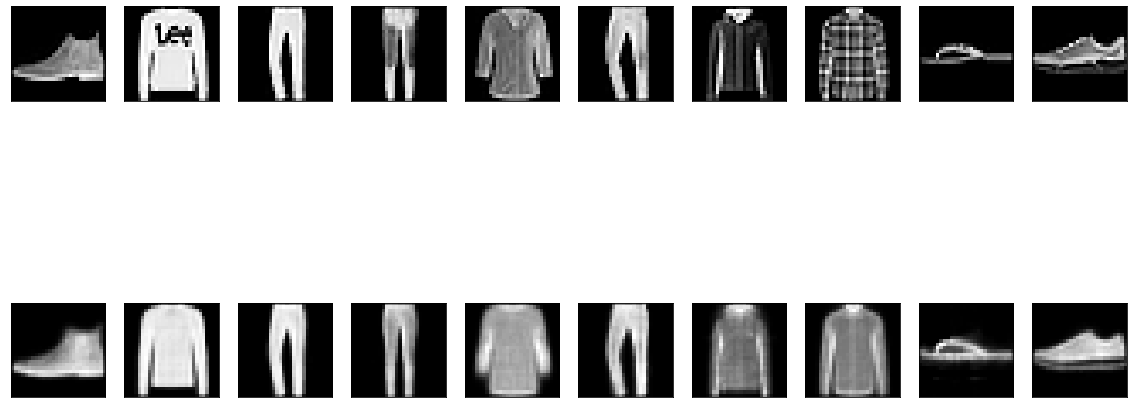

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
decoded_imgs = modelos[0].autoencoder.predict(x_val[0:10])
plt.figure(figsize=(20, 10))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.savefig("recuperation.png")